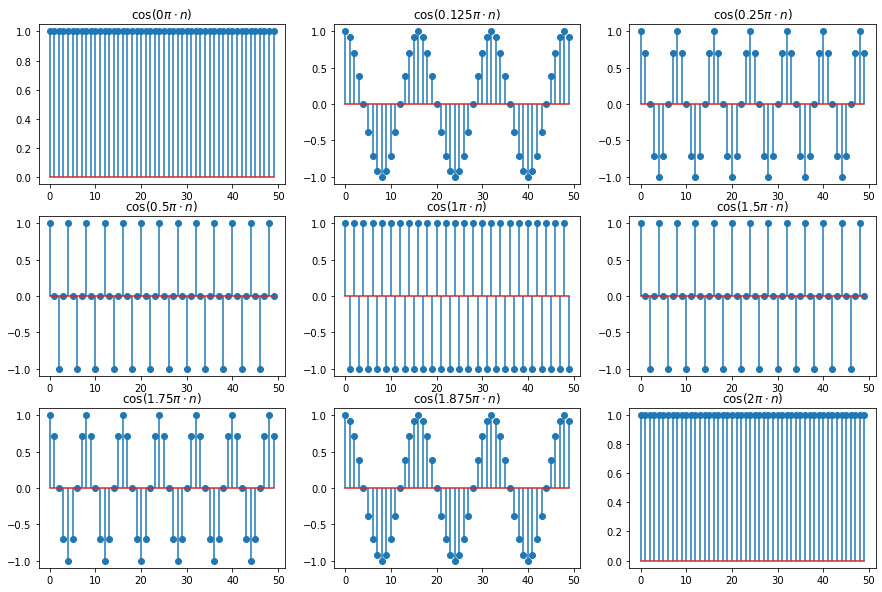

In [3]:
import numpy as np
import matplotlib.pyplot as plt

w0 = [0, 1/8, 1/4, 1/2, 1, 3/2, 7/4, 15/8, 2] #1/8 간격
n = np.arange(0,50)

plt.figure(figsize=(15,10))
for i in range(len(w0)):
    x = np.cos(w0[i]*np.pi*n)
    plt.subplot(3,3,i+1), plt.stem(x)
    plt.title(r'$\cos($' + str(w0[i]) + r'$\pi\cdot n)$')
    
plt.show()

가장 주파수가 높은거 : w0 = 1* pi  
e^(j*pi*n) = (-1)^n

이산 주파수는 2*pi 반복이다.  
== 0~pi 까지 뭐 반복이니까 그 까지만 봐도됨...ㅎ  
파이가 주파수가 제일 놓음. 고주파 파이를 기준으로 뒤집으면 똑같다.  

numpy.fft.fft(a,n)  
n이 클수록 주파수 분해능이 좋아진다.


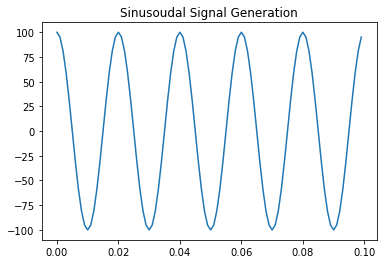

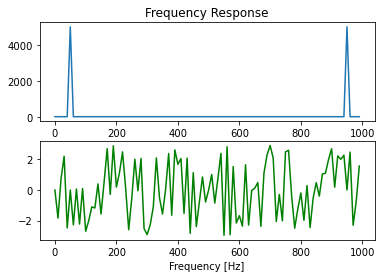

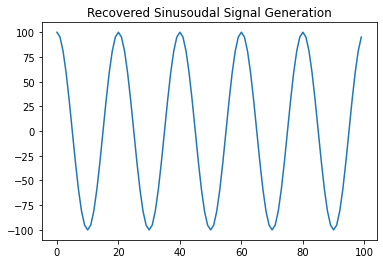

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# cosine wave : y(t) = A * cos(2 * pi * f * t)

f1 = 50
sampling_rate = 1000
amplitude = 100

tmin = 0
tmax = 0.1 # 샘플 100개

nmin = np.ceil(tmin*sampling_rate)
nmax = np.floor(tmax*sampling_rate)
n = np.arange(nmin,nmax)
x1 = amplitude*np.cos(2*np.pi*f1*n/sampling_rate) # signal sampling

plt.title('Sinusoudal Signal Generation')
plt.plot(n/sampling_rate, x1)
plt.show()

F = np.fft.fft(x1) # 100개 (0,1초라서)

Mag = np.abs(F)
Pha = np.angle(F)

length = len(F) #100
freq_bin = sampling_rate/length #1000/100 = 10Hz

w = np.arange(0,length)
w = w*freq_bin

plt.subplot(211)
plt.title('Frequency Response')
plt.plot(w, Mag)

plt.subplot(212)
plt.plot(w, Pha, 'g')
plt.xlabel('Frequency [Hz]')
plt.show()

F_recover = Mag*np.exp(1j*Pha) #복소수 
y = np.fft.ifft(F_recover) # impulse fft
y = np.real(y) #실수 부분만 복구한다.

plt.title('Recovered Sinusoudal Signal Generation')
#plt.plot(n/sampling_rate, y)
plt.plot(y[:100]) #만일 F = np.fft.fft(x1,1000) 일때. 100이후 값이 0으로 채워져서. 
plt.show()

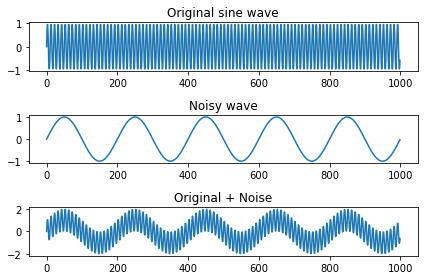

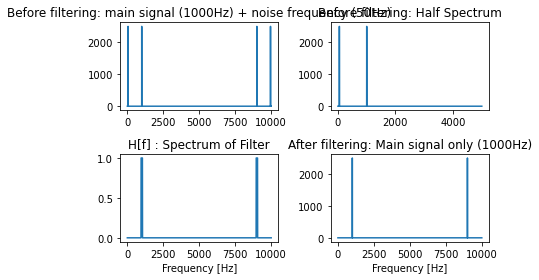

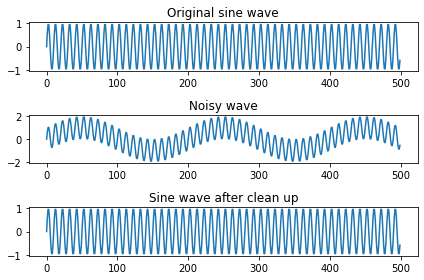

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, misc

frequency = 1000
noisy_freq = 50

num_samples = 5000
sampling_rate = 10000.0 # The sampling rate

# Create the sine wave and noise
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1 / sampling_rate) for x1 in range(num_samples)]

# Convert them to numpy arrays
sine_wave = np.array(sine_wave)
sine_noise = np.array(sine_noise)

# Add them to create a noisy signal
combined_signal = sine_wave + sine_noise
plt.subplot(3, 1, 1)
plt.title("Original sine wave")

# Need to add empty space, else everything looks scrunched up!
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:1000])
plt.subplot(3, 1, 2)
plt.title("Noisy wave")

plt.plot(sine_noise[:1000])
plt.subplot(3, 1, 3)
plt.title("Original + Noise")
plt.plot(combined_signal[:1000])
plt.tight_layout()
plt.show()

data_fft = np.fft.fft(combined_signal)
length = len(data_fft)
half_fft_point = int(length/2) # 절반만 볼라고. (2500개)

Mag = np.abs(data_fft)
Pha = np.angle(data_fft)
freq_bin = sampling_rate/length # 샘플 간격 2HZ

w = np.arange(0,length)
w = w*freq_bin

plt.subplot(221)
plt.title("Before filtering: main signal (1000Hz) + noise frequency (50Hz)")
plt.plot(w, Mag)

plt.subplot(222)
plt.title("Before filtering: Half Spectrum")
plt.plot(w[:half_fft_point], Mag[:half_fft_point])

filtered_Mag = np.zeros(length)
# H 필터 설정
for index in range(length):
    if (w[index] > 950 and w[index] < 1050) or (w[index] > 8950 and w[index] < 9050):
        filtered_Mag[index] = 1
    else:
        filtered_Mag[index] = 0
        
plt.subplot(223)
plt.title("H[f] : Spectrum of Filter")
plt.plot(w, filtered_Mag)
plt.xlabel('Frequency [Hz]')

Mag = Mag * filtered_Mag

plt.subplot(224)
plt.title("After filtering: Main signal only (1000Hz)") #x[n] 곱하기 ,h[n]
plt.plot(w, Mag)
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

data_fft = data_fft * filtered_Mag
recovered_signal = np.real(np.fft.ifft(data_fft))

plt.subplot(3, 1, 1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])

plt.subplot(3, 1, 2)
plt.title("Noisy wave")
plt.plot(combined_signal[:500])

plt.subplot(3, 1, 3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[:500]))
plt.tight_layout()
plt.show()

시험은 <실습문제 5-1> 처럼 낸답니동

ex) x(t)중 sin(300파이t)를 제거하라
머시기저시기~~~ㄴ